In [45]:
import numpy as np
import pandas as pd

import json

import seaborn as sns

import datetime

#!pip install folium
import folium

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Functions from class and for ploting
from source.twarc_hashtags_and_emojis import *
from source.plots_functions import *
from source.time_utils import *

#### Functions

#### Exercise 1. 
Using the full activity file of your politicians, obtain the most popular hashtags and present the top 10 in a bar plot using python.

In [3]:
# Loading the data

# 2020
my_path = "files"

converter = DataFrameConverter()
data = []
with open(my_path+"/politicians1.json") as f:
    for line in f:
        data.append(json.loads(line))
df_20 = converter.process(data)


# 2019
my_path = "files"

converter = DataFrameConverter()
data = []
with open(my_path+"/politicians2.json") as f:
    for line in f:
        data.append(json.loads(line))
df_19 = converter.process(data)

print('2020:', df_20.shape)
print('2019:', df_19.shape)

2020: (8464, 74)
2019: (5542, 74)


In [18]:
# Using the generator to create a new dataframe of hashtags, then convert every string to lowercase and counting each tweet
# 2020
hashtags_20 = pd.DataFrame(list(hash_retrieve(df_20)), columns=['hashtag', 'id'])
hashtags_20["hashtag"] = hashtags_20["hashtag"].str.lower() 
top10_20 = hashtags_20['hashtag'].value_counts()[:10].to_frame().reset_index()

# 2019
hashtags_19 = pd.DataFrame(list(hash_retrieve(df_19)), columns=['hashtag', 'id'])
hashtags_19["hashtag"] = hashtags_19["hashtag"].str.lower()
top10_19 = hashtags_19['hashtag'].value_counts()[:10].to_frame().reset_index()

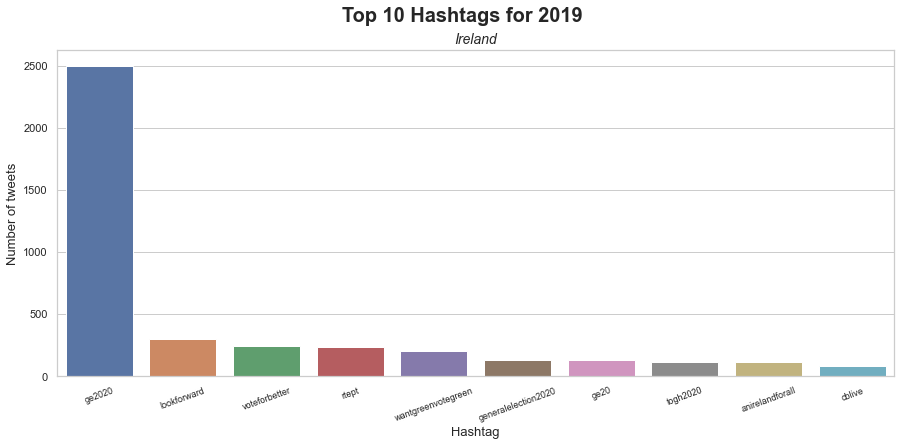

In [20]:
# Plot for 2020
bar_plots("index", "hashtag", top10_20, "Ireland", "Top 10 Hashtags for 2020", "Hashtag", "Number of tweets")

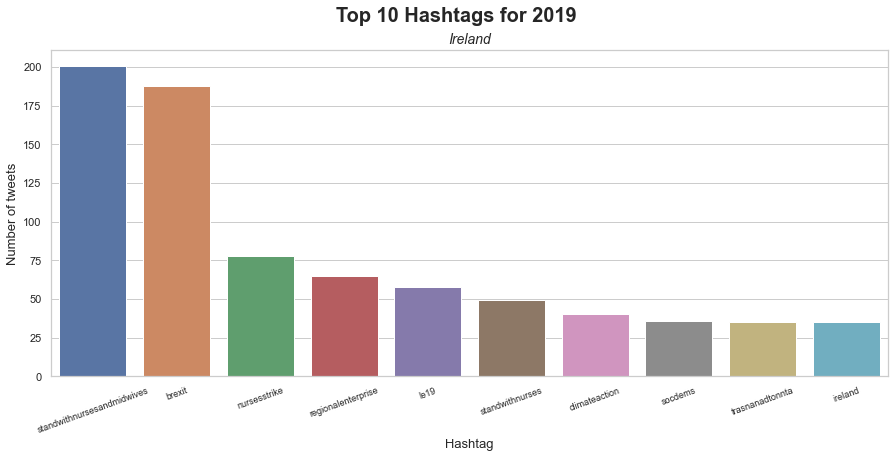

In [21]:
# Plot for 2019
bar_plots("index", "hashtag", top10_19, "Ireland", "Top 10 Hashtags for 2019", "Hashtag", "Number of tweets")

#### Exercise 2. 

Who are the politicians that use 1 more hashtags in the time period around the elections? Consider the top 5 politicians in terms of hashtag use and plot their relative usage 2with daily level aggregation (focus only on the week before and after the election periods). Comment, do you see some interesting facts?

In [26]:
# We have to consider only self made tweets 
no_retweet_20 = df_20.loc[df_20["retweeted_user_id"].isna()]
print(no_retweet_20.shape)

(4337, 74)


In [27]:
# Data frame with the hashtags
a = pd.DataFrame(list(hash_retrieve(no_retweet_20)), columns=['hashtag', 'id'])
print(a.shape)

(3610, 2)


In [28]:
# Merging to get the hashtags with its respectively usernames
hashtags_users = pd.merge(a, 
                          no_retweet_20[["id", 'author.id', 'author.username', 'author.name', 'created_at']],
                          on='id',how='left')
hashtags_users.head()

,hashtag,id,author.id,author.username,author.name,created_at
0,GE2020,1228460983636709377,39472243,AlanFarrell,Alan Farrell TD,2020-02-14T23:28:16.000Z
1,justiceforcesupervisors,1228377556681920512,116422140,alankellylabour,Alan Kelly TD,2020-02-14T17:56:46.000Z
2,Cavan,1228371339515486208,430714461,BrendanSmithTD,Brendan Smith,2020-02-14T17:32:04.000Z
3,Monaghan,1228371339515486208,430714461,BrendanSmithTD,Brendan Smith,2020-02-14T17:32:04.000Z
4,NorthMeath,1228371339515486208,430714461,BrendanSmithTD,Brendan Smith,2020-02-14T17:32:04.000Z


In [29]:
# Convert dates to local time
date_time(hashtags_users,'created_at','no','Etc/GMT+1')
hashtags_users['date_new'] = hashtags_users['date_new'].dt.date # get only the date

# Print the new dataframe
print(hashtags_users.shape)
hashtags_users.head()

(3610, 7)


,hashtag,id,author.id,author.username,author.name,created_at,date_new
0,GE2020,1228460983636709377,39472243,AlanFarrell,Alan Farrell TD,2020-02-14 23:28:16,2020-02-14
1,justiceforcesupervisors,1228377556681920512,116422140,alankellylabour,Alan Kelly TD,2020-02-14 17:56:46,2020-02-14
2,Cavan,1228371339515486208,430714461,BrendanSmithTD,Brendan Smith,2020-02-14 17:32:04,2020-02-14
3,Monaghan,1228371339515486208,430714461,BrendanSmithTD,Brendan Smith,2020-02-14 17:32:04,2020-02-14
4,NorthMeath,1228371339515486208,430714461,BrendanSmithTD,Brendan Smith,2020-02-14 17:32:04,2020-02-14


In [30]:
# Top five of politicians that use more hashtags in the time period around the elections
tags_used_user = hashtags_users["author.name"].value_counts()[:5]
tags_used_user

Michael Healy-Rae      171
Josepha Madigan ⚖️✨    163
Billy Timmins          158
Niamh Smyth TD         147
Mick Barry TD          112
Name: author.name, dtype: int64

In [31]:
# Computing the total hashtags used per day
hashtags_day = hashtags_users["date_new"].value_counts().to_frame(name="hashtags_day").rename_axis('date_new').reset_index()
hashtags_day.head()

,date_new,hashtags_day
0,2020-02-07,478
1,2020-02-04,460
2,2020-02-06,440
3,2020-02-05,438
4,2020-02-08,420


In [59]:
# Computing the average hastags used per day
hasgtag_day_authon = hashtags_users.groupby(["date_new", "author.name"]).size().reset_index()
hashtags_avg_day = 

,date_new,author.name,0
0,2020-02-01,Aindrias Moynihan TD,2
1,2020-02-01,Alan Farrell TD,6
2,2020-02-01,Alan Kelly TD,1
3,2020-02-01,Aodhán Ó Ríordáin,1
4,2020-02-01,Billy Timmins,42
...,...,...,...
725,2020-02-14,Mick Barry TD,3
726,2020-02-14,Neale Richmond,2
727,2020-02-14,Niamh Smyth TD,1
728,2020-02-14,Paul Donnelly TD,1


In [71]:
# Getting the total hashtag per day of the top tags users and their relative frequency

# filter by the top 5 users 
hashtags_users_5 = hashtags_users[hashtags_users["author.name"].isin(tags_used_user.reset_index()["index"].to_list())]

# Counts per user per day
users_5_day = hashtags_users_5.groupby(["author.name", "date_new"]).size().to_frame(name="hashtags_produced").reset_index()

# Merging and computing the relative frequency
users_5_day = pd.merge(users_5_day, hashtags_day, on='date_new',how='left')
users_5_day["relative_usage"] = users_5_day["hashtags_produced"]/users_5_day["hashtags_day"]
users_5_day["date_new"] = pd.to_datetime(users_5_day["date_new"])

users_5_day.head()


,author.name,date_new,hashtags_produced,hashtags_day,relative_usage
0,Billy Timmins,2020-02-01,42,344,0.122093
1,Billy Timmins,2020-02-03,10,402,0.024876
2,Billy Timmins,2020-02-04,14,460,0.030435
3,Billy Timmins,2020-02-05,26,438,0.059361
4,Billy Timmins,2020-02-06,34,440,0.077273


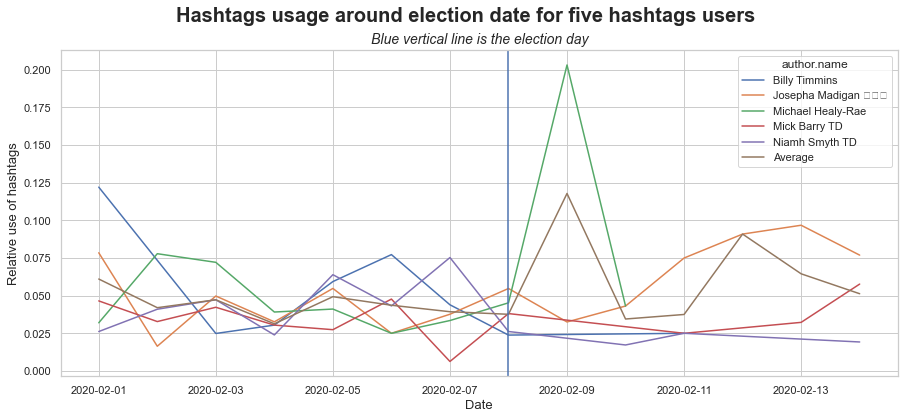

In [78]:
# Plot
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = "date_new", y = "relative_usage", data = users_5_day, hue="author.name")
plt.axvline(x=datetime.datetime(2020,2,8))

plt.title('Blue vertical line is the election day',fontsize=14, style="italic")
plt.suptitle("Hashtags usage around election date for five hashtags users", weight="bold").set_fontsize('20')
plt.xlabel("Date").set_fontsize('13')
plt.ylabel("Relative use of hashtags").set_fontsize('13')

In [50]:
hashtags_users[hashtags_users['author.name'] == "Michael Healy-Rae"]

,hashtag,id,author.id,author.username,author.name,created_at,date_new
857,Ge2020,1227019839836958723,346630615,MHealyRae,Michael Healy-Rae,2020-02-11 00:01:41,2020-02-10
858,RadioKerry,1227018995179626496,346630615,MHealyRae,Michael Healy-Rae,2020-02-10 23:58:20,2020-02-10
859,Ge2029RK,1227018995179626496,346630615,MHealyRae,Michael Healy-Rae,2020-02-10 23:58:20,2020-02-10
860,Ge2020,1227018572381270017,346630615,MHealyRae,Michael Healy-Rae,2020-02-10 23:56:39,2020-02-10
861,irishmedia,1227018572381270017,346630615,MHealyRae,Michael Healy-Rae,2020-02-10 23:56:39,2020-02-10
...,...,...,...,...,...,...,...
1778,MichaelHealyRae,1223569119913631745,346630615,MHealyRae,Michael Healy-Rae,2020-02-01 11:29:45,2020-02-01
1779,VoteNO1,1223569119913631745,346630615,MHealyRae,Michael Healy-Rae,2020-02-01 11:29:45,2020-02-01
1780,CoKerry,1223569119913631745,346630615,MHealyRae,Michael Healy-Rae,2020-02-01 11:29:45,2020-02-01
1781,GE2020,1223569119913631745,346630615,MHealyRae,Michael Healy-Rae,2020-02-01 11:29:45,2020-02-01


#### Exercise 4. 
Repeat exercise 1 for the dataset that you obtained about Miami beach. What was going on in Miami those days?

In [18]:
# Download the data of Miami with the correct query
!twarc2 search --archive --start-time "2019-03-29" --end-time "2019-03-31" "point_radius:[-80.1709 25.7423 3.11mi]" files/miami.jsonl
!twarc2 csv files/miami.jsonl files/miami.csv

100%|██████████████| Processed 3.45M/3.45M of input file [00:01<00:00, 3.46MB/s]

ℹ️
Parsed 1436 tweets objects from 15 lines in the input file.
Wrote 1436 rows and output 74 columns in the CSV.



In [3]:
# Load the data into pandas df
miami_df = pd.read_csv("files/miami.csv")
miami_df[miami_df.columns[pd.Series(miami_df.columns).str.startswith('geo')]].head()

,geo.coordinates.coordinates,geo.coordinates.type,geo.country,geo.country_code,geo.full_name,geo.geo.bbox,geo.geo.type,geo.id,geo.name,geo.place_id,geo.place_type
0,"[-80.18541, 25.77161]",Point,Estados Unidos,US,"Miami, FL","[-80.321683, 25.7090404, -80.144974, 25.855667]",Feature,04cb31bae3b3af93,Miami,04cb31bae3b3af93,city
1,NaN,NaN,Estados Unidos,US,Marlins Park,"[-80.22144846000792, 25.778580385989454, -80.2...",Feature,07d9d339c4084000,Marlins Park,07d9d339c4084000,poi
2,"[-80.192, 25.7752]",Point,Estados Unidos,US,"Miami, FL","[-80.321683, 25.7090404, -80.144974, 25.855667]",Feature,04cb31bae3b3af93,Miami,04cb31bae3b3af93,city
3,"[-80.18997042, 25.7584841]",Point,Estados Unidos,US,"Miami, FL","[-80.321683, 25.7090404, -80.144974, 25.855667]",Feature,04cb31bae3b3af93,Miami,04cb31bae3b3af93,city
4,"[-80.16957, 25.7767103]",Point,Estados Unidos,US,"Florida, USA","[-87.634643, 24.396308, -79.974307, 31.001056]",Feature,4ec01c9dbc693497,Florida,4ec01c9dbc693497,admin


In [23]:
# Retrieve the hashtags using the function
hashtags_miami = pd.DataFrame(list(hash_retrieve(miami_df)), columns=['hashtag', 'id'])

In [12]:
# Top 10 hasgtags df
hashtags_miami["hashtag"] = hashtags_miami["hashtag"].str.lower() # Convert everything to lowercase 
top10_miami = hashtags_miami['hashtag'].value_counts()[:10].to_frame().reset_index()

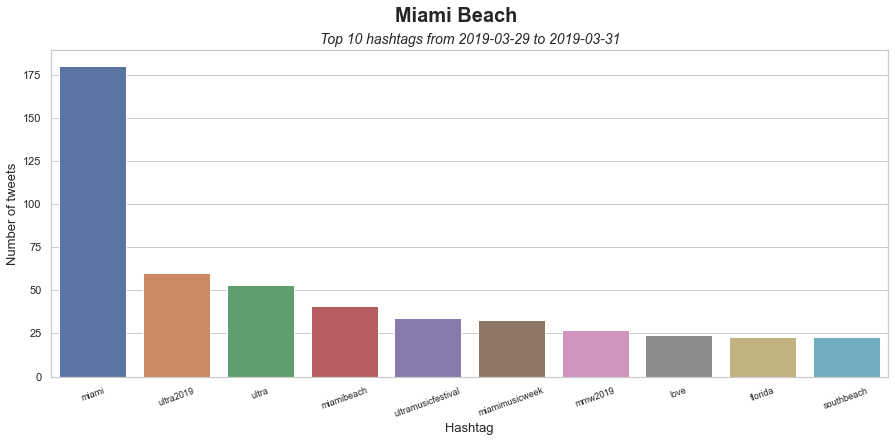

In [13]:
# Plot
bar_plots("index", "hashtag", top10_miami, "Top 10 hashtags from 2019-03-29 to 2019-03-31", "Miami Beach", "Hashtag", "Number of tweets")

#### Exercise 5. 
Using Miami’s dataset, complete the following function (preferably using python) using python:

In [ ]:
def map_tweets (df , center_coords , filename ):
    """
    Goes from a tweet df and outputs the html map of the geoccordinates .
    df: Dataframe | of tweets that contain geolocation
    center_coords : list | [lat ,lng ] of the centered point of the map
    filename : str | name of the output file in html format
    """

In [142]:
# Function
def map_tweets(df , center_coords, filename):
    """
    Goes from a tweet df and outputs the html map of the geoccordinates .
    df: Dataframe | of tweets that contain geolocation
    center_coords : list | [lat ,lng ] of the centered point of the map
    filename : str | name of the output file in html format
    """
    df2 = df.copy() # Copying the data frame
    df2 = df2.dropna(axis = 0, subset = ["geo.coordinates.coordinates"]) # Drop the rows without coordinates

    latitud = df2["geo.coordinates.coordinates"].apply(lambda x: re.findall('-?\d+\.\d+', x)[1]) # Get latitud
    longitude = df2["geo.coordinates.coordinates"].apply(lambda x: re.findall('-?\d+\.\d+', x)[0]) # Get longitude

    # Print a map centered at Miami
    miami_map = folium.Map(location=center_coords, zoom_start=12)

    # Looping over each row (point) to add it in the map 
    for point in latitud.index:
        folium.CircleMarker(location=[latitud[point], longitude[point]], radius=2, color = 'red', fill_color = 'red').add_to(miami_map)
        
    miami_map.save(filename) # Save the map

    return miami_map

In [143]:
# Test
map_tweets(miami_df , [25.7423, -80.1709], 'files/miami_tweets_map.html')